<a href="https://colab.research.google.com/github/ranpei97/E4511-2021-Pei/blob/main/Notebook/Data_Clean_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

TensorFlow 1.x selected.
--2021-04-28 05:19:17--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   124MB/s    in 4.1s    

2021-04-28 05:19:21 (123 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - bravado
    - molvs
    - mordred


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bravado-11.0.3             |     pyhd8ed1ab_0          31 KB  conda-forge
    bravado-core-5.17.0        |     pyh9f0ad1d_0          4

In [2]:
!pip install molvs
!pip install bravado
!pip install umap

  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=eb5548f0ced9518b5fe73b49d8f8d0510fe53c2f65dcf17f8f27490594d22b77
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc8555ae02ca2e6
Successfully built strict-rfc3339
  Created wheel for umap: filename=umap-0.1.1-cp37-none-any.whl size=3568 sha256=d2171266ab308c81e4887bc013d58c19ff386947c729013c86afe10ffffe280e
  Stored in directory: /root/.cache/pip/wheels/7b/29/33/b4d917dc95f69c0a060e2ab012d95e15db9ed4cc0b94ccac26
Successfully built umap


In [3]:
import warnings
warnings.filterwarnings('ignore')

import json
import os
import requests

# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

import matplotlib_venn as mpv
from rdkit import Chem
from matplotlib import pyplot as plt

In [4]:
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_ChEMBL_SMILES.csv
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_DTC_SMILES.csv
! wget https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_Excape_SMILES.csv

--2021-04-28 05:27:03--  https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_ChEMBL_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1043738 (1019K) [text/plain]
Saving to: ‘HTR2A_ChEMBL_SMILES.csv’

HTR2A_ChEMBL_SMILES 100%[===================>]   1019K  --.-KB/s    in 0.06s   

2021-04-28 05:27:03 (17.2 MB/s) - ‘HTR2A_ChEMBL_SMILES.csv’ saved [1043738/1043738]

--2021-04-28 05:27:03--  https://raw.githubusercontent.com/ranpei97/E4511-2021-Pei/main/HTR2A_DTC_SMILES.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 2

In [5]:
chembl = pd.read_csv('HTR2A_ChEMBL_SMILES.csv', header = 0)
chembl=chembl.drop(columns=chembl.iloc[:,0:1])
chembl

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles
0,CHEMBL4285839,NaN,0.0,437.54,0.0,2.17,3h,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,IC50,'=',854.000,nM,6.07,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,854.000,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...
1,CHEMBL4283546,NaN,0.0,425.60,0.0,3.98,3q,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',34.000,nM,7.47,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,34.000,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1
2,CHEMBL3264204,NaN,0.0,448.44,0.0,4.52,"2, TG6-10-1",COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,IC50,'=',75000.000,nM,4.12,NaN,NaN,UO_0000065,9.20,0.18,-0.40,6.68,False,CHEMBL3293197,Inhibition of 5HT2A receptor (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286257,1,Scientific Literature,Eur. J. Med. Chem.,2014.0,NaN,NaN,75000.000,COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...
3,CHEMBL4294797,NaN,0.0,419.55,0.0,4.10,8a,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',683.000,nM,6.17,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,683.000,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1
4,CHEMBL51,KETANSERIN,4.0,395.43,0.0,2.42,Ketanserin,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,IC50,'=',0.900,nM,9.05,NaN,NaN,UO_0000065,22.88,0.43,6.63,12.03,False,CHEMBL2394909,Binding affinity to human 5-HT2A receptor by r...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL2390830,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,NaN,NaN,0.900,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,CHEMBL4279645,NaN,0.0,469.61,0.0,1.78,4b,O=C1[C@@H]2[C@H](C(=O)N1CCCCN1CCN(c3cccc4sccc3...,IC50,'=',81.500,nM,7.09,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,81.500,O=C1[C@@H]2[C@H](C(=O)N1CCCCN1CCN(c3cccc4sccc3...
1830,CHEMBL4228313,NaN,0.0,472.56,0.0,4.53,4,COc1c(OCCOCCN=[N+]=[N-])cccc1[C@H](O)C1CCN

In [6]:
chembl['pChEMBL_Value_nM'] = -np.log10(chembl.Standard_Value_nM/1000000000)

In [7]:
chembl.head()

,Molecule_ChEMBL_ID,Molecule_Name,Molecule_Max_Phase,Molecular_Weight,#RO5_Violations,AlogP,Compound_Key,Smiles,Standard_Type,Standard_Relation,Standard_Value,Standard_Units,pChEMBL_Value,Data_Validity_Comment,Comment,Uo_Units,Ligand_Efficiency_BEI,Ligand_Efficiency_LE,Ligand_Efficiency_LLE,Ligand_Efficiency_SEI,Potential_Duplicate,Assay_ChEMBL_ID,Assay_Description,Assay_Type,BAO_Format_ID,BAO_Label,Assay_Organism,Assay_Tissue_ChEMBL_ID,Assay_Tissue_Name,Assay_Cell_Type,Assay_Subcellular_Fraction,Assay_Parameters,Assay_Variant_Accession,Assay_Variant_Mutation,Target_ChEMBL_ID,Target_Name,Target_Organism,Target_Type,Document_ChEMBL_ID,Source_ID,Source_Description,Document_Journal,Document_Year,Cell_ChEMBL_ID,Properties,Standard_Value_nM,base_rdkit_smiles,pChEMBL_Value_nM
0,CHEMBL4285839,NaN,0.0,437.54,0.0,2.17,3h,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,IC50,'=',854.0,nM,6.07,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,854.0,O=C1[C@H]2[C@@H]3C=C[C@@H](C3)[C@H]2C(=O)N1CCC...,6.068542
1,CHEMBL4283546,NaN,0.0,425.60,0.0,3.98,3q,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',34.0,nM,7.47,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,34.0,O=C1C2CCCCC2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,7.468521
2,CHEMBL3264204,NaN,0.0,448.44,0.0,4.52,"2, TG6-10-1",COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,IC50,'=',75000.0,nM,4.12,NaN,NaN,UO_0000065,9.20,0.18,-0.40,6.68,False,CHEMBL3293197,Inhibition of 5HT2A receptor (unknown origin),B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL3286257,1,Scientific Literature,Eur. J. Med. Chem.,2014.0,NaN,NaN,75000.0,COc1cc(/C=C/C(=O)NCCn2c(C(F)(F)F)cc3ccccc32)cc...,4.124939
3,CHEMBL4294797,NaN,0.0,419.55,0.0,4.10,8a,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,IC50,'=',683.0,nM,6.17,NaN,NaN,UO_0000065,NaN,NaN,NaN,NaN,False,CHEMBL4254803,Antagonist activity at 5-HT2A receptor (unknow...,F,BAO_0000019,assay format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4251643,1,Scientific Literature,Eur J Med Chem,2018.0,NaN,NaN,683.0,O=C1c2ccccc2C(=O)N1CCCCN1CCN(c2cccc3sccc23)CC1,6.165579
4,CHEMBL51,KETANSERIN,4.0,395.43,0.0,2.42,Ketanserin,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,IC50,'=',0.9,nM,9.05,NaN,NaN,UO_0000065,22.88,0.43,6.63,12.03,False,CHEMBL2394909,Binding affinity to human 5-HT2A receptor by r...,B,BAO_0000357,single protein format,Homo sapiens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHEMBL224,Serotonin 2a (5-HT2a) receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL2390830,1,Scientific Literature,Eur. J. Med. Chem.,2013.0,NaN,NaN,0.9,O=C(c1ccc(F)cc1)C1CCN(CCn2c(=O)[nH]c3ccccc3c2=...,9.045757


In [8]:
# drop NA pIC50's & smiles
chembl=chembl.dropna(axis=0, subset = ['pChEMBL_Value_nM','base_rdkit_smiles'])
print(chembl.shape)

(1084, 48)


In [9]:
chembl.Standard_Relation.unique()

array(["'='", "'>'", "'<'"], dtype=object)

In [10]:
# flip arrows and fix punctuation for relation column to reflect pValues not normal values
chembl['pRelation'] = chembl.Standard_Relation
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'<'", ">", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'>'", "<", chembl.pRelation)
chembl['pRelation'] = np.where(chembl.Standard_Relation == "'='", "=", chembl.pRelation)
chembl[['Standard_Relation', 'pRelation']].head()

,Standard_Relation,pRelation
0,'=',=
1,'=',=
2,'=',=
3,'=',=
4,'=',=


In [11]:
thresh=-np.log10(100/1000000000) # pIC50 of 100nM for threshold

In [12]:
print(chembl.shape)
chembl_cur = curate_data.aggregate_assay_data(chembl, value_col = 'pChEMBL_Value_nM', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Molecule_ChEMBL_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
print(chembl_cur.shape)
chembl_cur.head()

(1084, 49)
0 entries in input table are missing SMILES strings
988 unique SMILES strings are reduced to 988 unique base SMILES strings
(988, 5)


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL1222134,CC(C)N(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2cc...,,6.928118,0
1,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,,6.619789,0
2,CHEMBL3286557,CNc1nc(C(F)(F)c2ccccc2)nc2c1CCNCC2,,6.924453,0
3,CHEMBL3601045,CC(=O)NC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(F)cc4)nn3...,,6.146910,0
4,CHEMBL1933398,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991826,0


In [13]:
chembl_cur.to_csv("HTR2A_ChEMBL_SMILES_Cleaned.csv")

## DTC

In [14]:
# select pIC50 values
dtc = pd.read_csv('HTR2A_DTC_SMILES.csv', header = 0)

vals = ['EC50', 'IC50', 'PIC50']
print(dtc.shape)
dtc=dtc[dtc.End_Point_Standard_Type.isin(vals)]
print(dtc.shape)


(1826, 47)
(1826, 47)


In [15]:
# flip arrows for relation column to reflect pValues not normal values
dtc['pRelation'] = dtc.End_Point_Standard_Relation
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "<", ">", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == ">", "<", dtc.pRelation)
dtc['pRelation'] = np.where(dtc.End_Point_Standard_Relation == "=", "=", dtc.pRelation)
print(dtc.pRelation.unique())
display(dtc[['End_Point_Standard_Relation', 'pRelation']].head())

[nan '=' '<' '>']


,End_Point_Standard_Relation,pRelation
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [16]:
dtc=dtc.dropna(axis=0, subset = ['pDTC_Value','base_rdkit_smiles'])
print(dtc.shape)

(1074, 48)


In [17]:
# aggregate duplicates
dtc_cur = curate_data.aggregate_assay_data(dtc, value_col = 'pDTC_Value', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Compound_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
dtc_cur.to_csv("HTR2A_DTC_SMILES_Cleaned.csv")
print(dtc_cur.shape)
print(dtc_cur.relation.unique())
dtc_cur.head()

0 entries in input table are missing SMILES strings
874 unique SMILES strings are reduced to 874 unique base SMILES strings
(874, 5)
['' '<' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL1222134,CC(C)N(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2cc...,,6.928118,0
1,CHEMBL3286557,CNc1nc(C(F)(F)c2ccccc2)nc2c1CCNCC2,,6.924453,0
2,CHEMBL3601045,CC(=O)NC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(F)cc4)nn3...,,6.146910,0
3,CHEMBL1933398,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991826,0
4,CHEMBL1933396,CN1CCC(N(C)S(=O)(=O)c2ccc(F)cc2)CC1,,5.229148,0


## Excape

In [18]:
excape = pd.read_csv('HTR2A_Excape_SMILES.csv', header = 0)

# excape: has no relation col, so create one with all ''
excape['pRelation']=''
print(excape.shape)
print(excape.pRelation.unique())
excape=excape.dropna(axis=0, subset = ['pXC50','base_rdkit_smiles'])
print(excape.shape)
# aggregate duplicates
excape_cur = curate_data.aggregate_assay_data(excape, value_col = 'pXC50', 
                                              output_value_col = 'pXC50',
                                              id_col = 'Original_Entry_ID', 
                                              smiles_col = 'base_rdkit_smiles',
                                              relation_col = 'pRelation',
                                              active_thresh=thresh)
excape_cur.to_csv("HTR2A_Excape_SMILES_Cleaned.csv")
print(excape_cur.shape)
print(excape_cur.relation.unique())
excape_cur.head()

(2604, 14)
['']
(2558, 14)
0 entries in input table are missing SMILES strings
2557 unique SMILES strings are reduced to 2554 unique base SMILES strings
(2554, 5)
['']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL2237155,Cn1c(=O)c2c(nc3n2CCCCN3CCCN2CCN(c3ccccc3)CC2)n...,,6.59000,0
1,54189746,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.99183,0
2,CHEMBL1957810,O=C(c1cn2ccccc2n1)N1CCN(CCc2ccc(F)cc2F)CC1,,8.37000,1
3,CHEMBL2179699,CC(C)n1nc(C(=O)NCC2CCN(CCC3CCCCC3)CC2)c2ccccc21,,6.00000,0
4,49836524,O=C(O)C1CCN(C2CC[C@]3(Cc4ccccc4Cc4ccccc43)C2)C1,,7.70006,1


## Merge

In [19]:
dtc_cur['datasource']='dtc'
excape_cur['datasource']='excape'
HTR2A = pd.concat([chembl_cur, dtc_cur, excape_cur])
HTR2A.to_csv("HTR2A_merge.csv")
print(HTR2A.shape)

(4416, 6)


In [20]:
HTR2A

,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource
0,CHEMBL1222134,CC(C)N(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2cc...,,6.928118,0,NaN
1,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,,6.619789,0,NaN
2,CHEMBL3286557,CNc1nc(C(F)(F)c2ccccc2)nc2c1CCNCC2,,6.924453,0,NaN
3,CHEMBL3601045,CC(=O)NC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(F)cc4)nn3...,,6.146910,0,NaN
4,CHEMBL1933398,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991826,0,NaN
...,...,...,...,...,...,...
2549,9287,CC(N)Cc1c[nH]c2ccccc12,,7.723540,1,excape
2550,CHEMBL314885,CN(C)CC1CC2c3cc(F)ccc3Cc3ccccc3N2O1,,7.270000,1,excape
2551,21099424,O=S(=O)(c1ccccc1)c1ccc(CCc2ccc(F)cc2F)cc1,,8.844660,1,excape
2552,CHEMBL328573,CN(C)C[C@@H]1C[C@@H]2c3ccccc3Cc3ccccc3N2O1,,8.600000,1,excape


In [34]:
column = 'pXC50'

# tolerance: Percentage of individual respsonse values allowed to different 
# from the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'base_rdkit_smiles'

HTR2A_cur = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       HTR2A, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)

Bad duplicates removed from dataset
Dataframe size (4411, 10)
List of 'bad' duplicates removed
      compound_id      pXC50  VALUE_NUM_mean   Perc_Var  VALUE_NUM_std
41     CHEMBL1112   5.756502        6.803632  15.390762       1.991278
1022   CHEMBL1112   5.554396        6.803632  18.361319       1.991278
1897   CHEMBL1112   9.100000        6.803632  33.752081       1.991278
510   CHEMBL74355   8.319393        9.159697   9.173923       1.188369
3510  CHEMBL74355  10.000000        9.159697   9.173923       1.188369

Dataset de-duplicated
Dataframe size (2920, 10)
New column created with averaged values:  VALUE_NUM_mean


In [35]:
HTR2A_cur

,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL1222134,CC(C)N(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2cc...,,6.928118,0,NaN,6.928745,0.001087,9.054103e-03,0
1,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,,6.619789,0,NaN,6.619789,NaN,0.000000e+00,0
2,CHEMBL3286557,CNc1nc(C(F)(F)c2ccccc2)nc2c1CCNCC2,,6.924453,0,NaN,6.924452,0.000002,1.462743e-05,0
3,CHEMBL3601045,CC(=O)NC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(F)cc4)nn3...,,6.146910,0,NaN,6.146910,0.000000,1.444918e-14,0
4,CHEMBL1933398,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991826,0,NaN,5.991827,0.000002,2.327619e-05,0
...,...,...,...,...,...,...,...,...,...,...
4404,CHEMBL423206,Fc1ccc2c(c1)CCC1(CCN(C3CCc4ccccc4C3)CC1)O2,,7.020000,1,excape,7.020000,NaN,0.000000e+00,0
4405,CHEMBL3287395,CCOC(=O)c1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)...,,7.660000,1,excape,7.660000,NaN,0.000000e+00,0
4406,9287,CC(N)Cc1c[nH]c2ccccc12,,7.723540,1,excape,7.723540,NaN,0.000000e+00,0
4408,21099424,O=S(=O)(c1ccccc1)c1ccc(CCc2ccc(F)cc2F)cc1,,8.844660,1,excape,8.844660,NaN,0.000000e+00,0


In [22]:

#import importlib
#importlib.reload(curate_data)
#HTR2A_cur = curate_data.aggregate_assay_data(HTR2A, value_col = 'pXC50', 
                                              #id_col = 'compound_id', 
                                              #smiles_col = 'base_rdkit_smiles',
                                              #relation_col = 'relation',
                                              #active_thresh=thresh)

#print(HTR2A_cur.shape)
#print(HTR2A.relation.unique())
#HTR2A_cur.head()

0 entries in input table are missing SMILES strings
2922 unique SMILES strings are reduced to 2922 unique base SMILES strings
(2922, 5)
['' '<' '>']


,compound_id,base_rdkit_smiles,relation,pXC50,active
0,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,,6.619789,0
1,CHEMBL2237155,Cn1c(=O)c2c(nc3n2CCCCN3CCCN2CCN(c3ccccc3)CC2)n...,,6.590000,0
2,54189746,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991827,0
3,CHEMBL1957810,O=C(c1cn2ccccc2n1)N1CCN(CCc2ccc(F)cc2F)CC1,,8.370000,1
4,CHEMBL2179699,CC(C)n1nc(C(=O)NCC2CCN(CCC3CCCCC3)CC2)c2ccccc21,,6.000000,0


In [36]:
HTR2A_cur

,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate
0,CHEMBL1222134,CC(C)N(c1cccc(N2CCN(C)CC2)c1)S(=O)(=O)c1ccc2cc...,,6.928118,0,NaN,6.928745,0.001087,9.054103e-03,0
1,CHEMBL3775576,CNC(=O)c1ccc2[nH]nc(Cc3ccc4c(cnn4C)c3)c2c1,,6.619789,0,NaN,6.619789,NaN,0.000000e+00,0
2,CHEMBL3286557,CNc1nc(C(F)(F)c2ccccc2)nc2c1CCNCC2,,6.924453,0,NaN,6.924452,0.000002,1.462743e-05,0
3,CHEMBL3601045,CC(=O)NC1CCN(Cc2ccc(OCCCc3ccc(-c4ccc(F)cc4)nn3...,,6.146910,0,NaN,6.146910,0.000000,1.444918e-14,0
4,CHEMBL1933398,CN1CCC(N(C)S(=O)(=O)c2ccccc2)CC1,,5.991826,0,NaN,5.991827,0.000002,2.327619e-05,0
...,...,...,...,...,...,...,...,...,...,...
4404,CHEMBL423206,Fc1ccc2c(c1)CCC1(CCN(C3CCc4ccccc4C3)CC1)O2,,7.020000,1,excape,7.020000,NaN,0.000000e+00,0
4405,CHEMBL3287395,CCOC(=O)c1cc2cc(OCCCCN3CCN(c4cccc(Cl)c4Cl)CC3)...,,7.660000,1,excape,7.660000,NaN,0.000000e+00,0
4406,9287,CC(N)Cc1c[nH]c2ccccc12,,7.723540,1,excape,7.723540,NaN,0.000000e+00,0
4408,21099424,O=S(=O)(c1ccccc1)c1ccc(CCc2ccc(F)cc2F)cc1,,8.844660,1,excape,8.844660,NaN,0.000000e+00,0


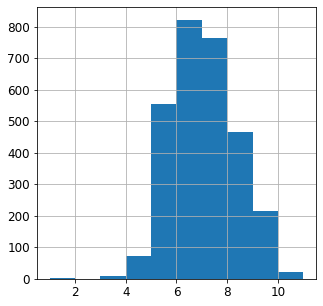

In [37]:
HTR2A_cur.pXC50.hist(figsize=(5,5));

In [38]:
HTR2A_cur.active.sum()

1452

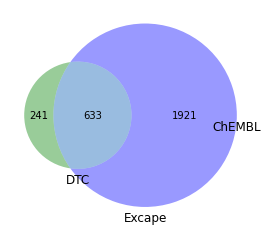

In [39]:
mpv.venn3([set(HTR2A.loc[HTR2A.datasource=='chembl','base_rdkit_smiles']),
           set(HTR2A.loc[HTR2A.datasource=='dtc','base_rdkit_smiles']),
           set(HTR2A.loc[HTR2A.datasource=='excape','base_rdkit_smiles']),],
          set_labels = ['ChEMBL','DTC','Excape']);

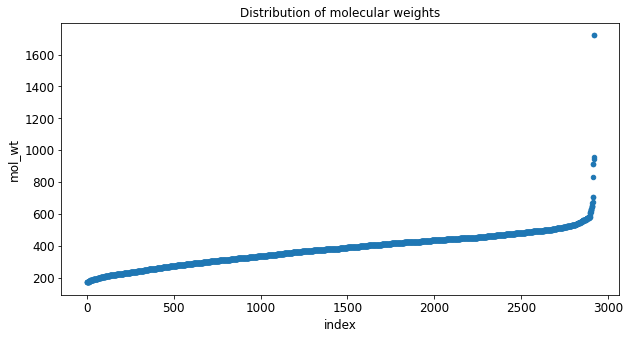

In [40]:

HTR2A_cur["mol_wt"] = [Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smile)) for smile in HTR2A_cur["base_rdkit_smiles"]]
HTR2A_cur = HTR2A_cur.sort_values('mol_wt')
HTR2A_cur=HTR2A_cur.reset_index(drop=True)
HTR2A_cur=HTR2A_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(10,5))
HTR2A_cur.plot(kind='scatter', x='index', y='mol_wt', ax=ax);
plt.title("Distribution of molecular weights");

In [41]:
print(HTR2A_cur.shape)
HTR2A_cur = HTR2A_cur[HTR2A_cur.mol_wt <1400]
print(HTR2A_cur.shape)

(2920, 12)
(2918, 12)


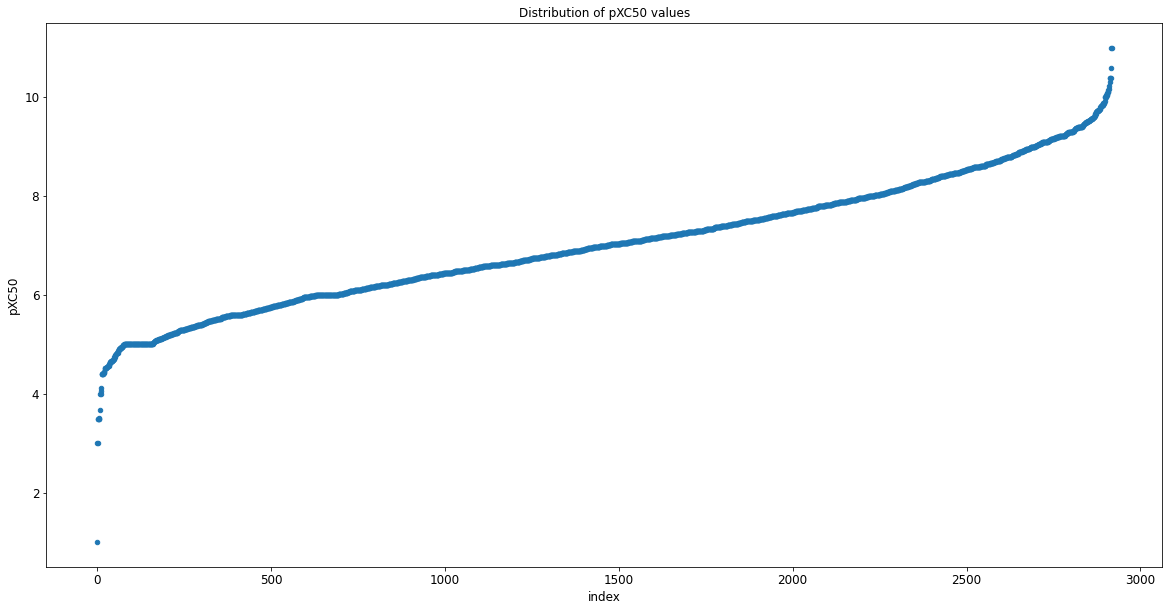

In [42]:
HTR2A_cur=HTR2A_cur.drop(columns=['index'])
HTR2A_cur = HTR2A_cur.sort_values('pXC50')
HTR2A_cur = HTR2A_cur.reset_index(drop=True)
HTR2A_cur = HTR2A_cur.reset_index() # plot x axis as index #'s
fig,ax=plt.subplots(figsize=(20,10))
HTR2A_cur.plot(kind='scatter', x='index', y='pXC50', ax=ax);
plt.title("Distribution of pXC50 values");


In [43]:
print(HTR2A_cur.shape)
HTR2A_cur=HTR2A_cur[HTR2A_cur.pXC50>3]
HTR2A_cur=HTR2A_cur[HTR2A_cur.pXC50<14]
print(HTR2A_cur.shape)

(2918, 12)
(2915, 12)


In [44]:
for col in HTR2A_cur.columns:
  print(col, HTR2A_cur[col].isna().values.any())

index False
compound_id True
base_rdkit_smiles False
relation False
pXC50 False
active False
datasource True
VALUE_NUM_mean False
VALUE_NUM_std True
Perc_Var False
Remove_BadDuplicate False
mol_wt False


In [56]:
HTR2A_cur

,index,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,mol_wt
3,3,CHEMBL2331796,CCOc1noc2c1CCN(C)CC2,,3.50000,0,excape,3.50000,NaN,0.0,0,196.121178
4,4,CHEMBL2331791,CCN1OC2=CCN(C)CCC2C1=O,,3.50000,0,excape,3.50000,NaN,0.0,0,196.121178
5,5,CHEMBL2331808,CN1CC=C2ON(C)C(=O)C2CC1,,3.50000,0,excape,3.50000,NaN,0.0,0,182.105528
6,6,CHEMBL2331795,COc1noc2c1CCN(C)CC2,,3.50000,0,excape,3.50000,NaN,0.0,0,182.105528
7,7,CHEMBL2331805,CCN1OC2=CCNCCC2C1=O,,3.52000,0,excape,3.52000,NaN,0.0,0,182.105528
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,2913,CHEMBL149024,CC(N)Cc1c2ccoc2c(Br)c2ccoc12,,10.40000,1,excape,10.40000,NaN,0.0,0,293.005141
2914,2914,CHEMBL83894,O=S1(=O)c2cccc3cccc(c23)N1CCCN1CCN(c2ccc(F)cc2...,,10.40000,1,excape,10.40000,NaN,0.0,0,425.157326
2915,2915,CHEMBL3652592,Cn1nccc1-c1cc(NC(=O)C(=O)c2ccc(F)cc2)ccc1OCCN,,10.60206,1,NaN,10.60206,0.0,0.0,0,382.144119
2916,2916,CHEMBL253022,CCC(=O)NC1CCc2ccc(CCN3CCN(c4nsc5ccccc45)CC3)cc21,,11.00000,1,excape,11.00000,NaN,0.0,0,434.214033


In [62]:
# Remove duplicate compound_id rows
HTR2A_cur[HTR2A_cur.compound_id.duplicated(keep=False)==True].sort_values(by='compound_id')

,index,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource,VALUE_NUM_mean,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,mol_wt
2521,2521,CHEMBL1108,O=C(CCCN1CC=C(n2c(=O)[nH]c3ccccc32)CC1)c1ccc(F...,,8.587707,1,NaN,8.588044,0.000476,0.003917,0,379.169605
2738,2738,CHEMBL1108,O=C(CCCN1CC=C(n2c(O)nc3ccccc32)CC1)c1ccc(F)cc1,,9.130000,1,excape,9.130000,NaN,0.000000,0,379.169605
2559,2559,CHEMBL119443,C[C@@H](CO)NC(=O)[C@@H]1C=C2c3cccc4[nH]cc(c34)...,,8.656591,1,NaN,8.656100,0.000696,0.005682,0,325.179027
2766,2766,CHEMBL119443,C[C@@H](CO)NC(=O)[C@@H]1Cc2c(cc3c[nH]c4c3c2C=C...,,9.200000,1,excape,9.200000,NaN,0.000000,0,325.179027
1963,1963,CHEMBL1201203,CN1[C@H]2CC[C@@H]1C[C@H](OC(c1ccccc1)c1ccccc1)C2,,7.619789,1,NaN,7.889894,0.381987,3.423438,0,307.193614
...,...,...,...,...,...,...,...,...,...,...,...,...
120,120,NaN,C=CCNC(=O)/C=C/c1cc(OC)c(OC)c(OC)c1,,5.000000,0,dtc,5.000000,NaN,0.000000,0,277.131408
150,150,NaN,CCCCCCNC(=O)/C=C/c1cc(OC)c(OC)c(OC)c1,,5.000000,0,dtc,5.000000,NaN,0.000000,0,321.194008
151,151,NaN,CCCCNC(=O)/C=C/c1cc(OC)c(OC)c(OC)c1,,5.000000,0,dtc,5.000000,NaN,0.000000,0,293.162708
170,170,NaN,CC(=O)Nc1ccc(C(=O)Nc2cc(-c3cccs3)ccc2N)cc1,,5.083746,0,dtc,5.083746,NaN,0.000000,0,351.104148


In [63]:
df_grouped = HTR2A_cur.groupby('compound_id', as_index=False)['VALUE_NUM_mean'].mean()
df_grouped

,compound_id,VALUE_NUM_mean
0,10017556,7.013230
1,10022781,9.250260
2,10042602,8.289880
3,10064386,7.214670
4,10088453,6.850010
...,...,...
2857,CHEMBL96471,5.960000
2858,CHEMBL96732,6.990000
2859,CHEMBL96883,6.800000
2860,CHEMBL97450,6.590000


In [64]:
df_dedup = HTR2A_cur.drop_duplicates('compound_id')
df_avg = df_dedup.merge(df_grouped, left_on='compound_id', right_on='compound_id')

In [65]:
df_avg.drop('VALUE_NUM_mean_x', axis=1, inplace=True)
df_avg.rename(columns={'VALUE_NUM_mean_y': 'VALUE_NUM_mean'}, inplace=True)
df_avg

,index,compound_id,base_rdkit_smiles,relation,pXC50,active,datasource,VALUE_NUM_std,Perc_Var,Remove_BadDuplicate,mol_wt,VALUE_NUM_mean
0,3,CHEMBL2331796,CCOc1noc2c1CCN(C)CC2,,3.50000,0,excape,NaN,0.0,0,196.121178,3.50000
1,4,CHEMBL2331791,CCN1OC2=CCN(C)CCC2C1=O,,3.50000,0,excape,NaN,0.0,0,196.121178,3.50000
2,5,CHEMBL2331808,CN1CC=C2ON(C)C(=O)C2CC1,,3.50000,0,excape,NaN,0.0,0,182.105528,3.50000
3,6,CHEMBL2331795,COc1noc2c1CCN(C)CC2,,3.50000,0,excape,NaN,0.0,0,182.105528,3.50000
4,7,CHEMBL2331805,CCN1OC2=CCNCCC2C1=O,,3.52000,0,excape,NaN,0.0,0,182.105528,3.52000
...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2913,CHEMBL149024,CC(N)Cc1c2ccoc2c(Br)c2ccoc12,,10.40000,1,excape,NaN,0.0,0,293.005141,10.40000
2858,2914,CHEMBL83894,O=S1(=O)c2cccc3cccc(c23)N1CCCN1CCN(c2ccc(F)cc2...,,10.40000,1,excape,NaN,0.0,0,425.157326,10.40000
2859,2915,CHEMBL3652592,Cn1nccc1-c1cc(NC(=O)C(=O)c2ccc(F)cc2)ccc1OCCN,,10.60206,1,NaN,0.0,0.0,0,382.144119,10.60206
2860,2916,CHEMBL253022,CCC(=O)NC1CCc2ccc(CCN3CCN(c4nsc5ccccc45)CC3)cc21,,11.00000,1,excape,NaN,0.0,0,434.214033,11.00000


In [66]:
df_avg = df_avg.drop(['datasource','Remove_BadDuplicate'], axis = 1)
df_avg

,index,compound_id,base_rdkit_smiles,relation,pXC50,active,VALUE_NUM_std,Perc_Var,mol_wt,VALUE_NUM_mean
0,3,CHEMBL2331796,CCOc1noc2c1CCN(C)CC2,,3.50000,0,NaN,0.0,196.121178,3.50000
1,4,CHEMBL2331791,CCN1OC2=CCN(C)CCC2C1=O,,3.50000,0,NaN,0.0,196.121178,3.50000
2,5,CHEMBL2331808,CN1CC=C2ON(C)C(=O)C2CC1,,3.50000,0,NaN,0.0,182.105528,3.50000
3,6,CHEMBL2331795,COc1noc2c1CCN(C)CC2,,3.50000,0,NaN,0.0,182.105528,3.50000
4,7,CHEMBL2331805,CCN1OC2=CCNCCC2C1=O,,3.52000,0,NaN,0.0,182.105528,3.52000
...,...,...,...,...,...,...,...,...,...,...
2857,2913,CHEMBL149024,CC(N)Cc1c2ccoc2c(Br)c2ccoc12,,10.40000,1,NaN,0.0,293.005141,10.40000
2858,2914,CHEMBL83894,O=S1(=O)c2cccc3cccc(c23)N1CCCN1CCN(c2ccc(F)cc2...,,10.40000,1,NaN,0.0,425.157326,10.40000
2859,2915,CHEMBL3652592,Cn1nccc1-c1cc(NC(=O)C(=O)c2ccc(F)cc2)ccc1OCCN,,10.60206,1,0.0,0.0,382.144119,10.60206
2860,2916,CHEMBL253022,CCC(=O)NC1CCc2ccc(CCN3CCN(c4nsc5ccccc45)CC3)cc21,,11.00000,1,NaN,0.0,434.214033,11.00000


In [67]:
df_avg.to_csv("HTR2A_cur.csv")